In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
data=pd.read_csv('/home/danhd/Desktop/ZingMp3_Spam/spam-data.txt',sep='\t',header=None)
data.columns = ['songID','IP','username','visitorID','details','t1','t10']
data.head(4)

,songID,IP,username,visitorID,details,t1,t10
0,1075542680,1.55.197.9,NaN,NaN,"{""strGenreId"":""1"",""from_id"":""album"",""artistId""...",1,10
1,6222235,42.114.37.199,maimaimotminhta123,NaN,"{""strGenreId"":""1"",""artistId"":""0"",""id"":""6222235...",1,10
2,1074700863,118.70.81.116,NaN,NaN,"{""strGenreId"":""1"",""artistId"":""40466"",""id"":""107...",1,10
3,1074797521,113.175.241.192,NaN,NaN,"{""strGenreId"":""1"",""artistId"":""16409"",""id"":""107...",1,10


In [4]:
groupData=data.groupby(['songID','IP'])
groupData.head(6)

songID  IP             
11      113.163.119.217    2
        116.100.146.102    1
33      113.176.203.219    1
101     113.163.17.93      1
151     14.174.194.186     1
176     14.181.124.83      1
dtype: int64

In [81]:
groupData=data.groupby(['songID']).agg({'IP':pd.Series.nunique,'songID':pd.Series.count})
groupData.head(6)

,IP,songID
songID,,
11,2,3
33,1,1
101,1,1
151,1,1
176,1,1
215,1,1


In [82]:
groupData.columns=['IP count','Listen count']
print groupData.head(6)

        IP count  Listen count
songID                        
11             2             3
33             1             1
101            1             1
151            1             1
176            1             1
215            1             1

[6 rows x 2 columns]


In [14]:
data.describe()

,songID,visitorID,t1,t10
count,7.503414e+06,0,7503414,7503414
mean,1.036028e+09,NaN,1,10
std,2.009755e+08,NaN,0,0
min,1.100000e+01,NaN,1,10
25%,1.074618e+09,NaN,1,10
50%,1.075481e+09,NaN,1,10
75%,1.075750e+09,NaN,1,10
max,1.075764e+09,NaN,1,10


In [15]:
groupData.describe()

,IP,songID
count,206569.000000,206569.000000
mean,27.294613,36.324008
std,640.641246,961.251144
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,4.000000,5.000000
max,99694.000000,167738.000000


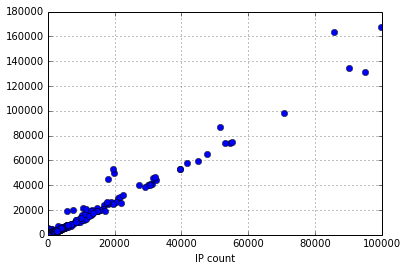

In [83]:
groupData.plot(x='IP count',y='Listen count',style='o')

In [84]:
filterIPData=groupData[groupData['IP count']<=40000]
filterIPData.head(6)

,IP count,Listen count
songID,,
11,2,3
33,1,1
101,1,1
151,1,1
176,1,1
215,1,1


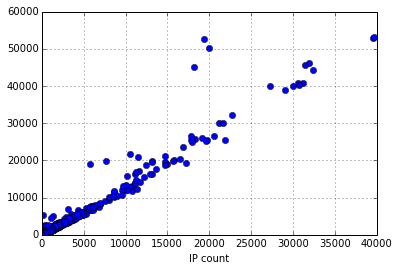

In [85]:
filterIPData.plot(x='IP count',y='Listen count',style='o')

In [41]:
data['visitorID'].describe()

count     0
mean    NaN
std     NaN
min     NaN
25%     NaN
50%     NaN
75%     NaN
max     NaN
Name: visitorID, dtype: float64

In [3]:
import numpy as np
dataUser=data.dropna(subset=['username'])
dataUser.head(6)

,songID,IP,username,visitorID,details,t1,t10
1,6222235,42.114.37.199,maimaimotminhta123,NaN,"{""strGenreId"":""1"",""artistId"":""0"",""id"":""6222235...",1,10
9,1073880377,118.71.192.75,b0y0verkiz,NaN,"{""strGenreId"":""1"",""from_id"":""playlist"",""artist...",1,10
12,1075213826,1.55.223.211,shitanloz,NaN,"{""strGenreId"":""3"",""artistId"":""32138"",""id"":""107...",1,10
18,1075755353,117.6.127.156,010ewg,NaN,"{""strGenreId"":""1"",""from_id"":""album"",""artistId""...",1,10
29,1073875809,123.17.150.112,princess_clamp,NaN,"{""strGenreId"":""1"",""artistId"":""7902"",""id"":""1073...",1,10
39,1075541198,42.112.155.3,sosdl.ke,NaN,"{""strGenreId"":""1"",""from_id"":""playlist"",""artist...",1,10


In [4]:
groupUserData=dataUser.groupby(['songID']).agg({'username':pd.Series.nunique,'songID':pd.Series.count})
groupUserData.columns=['User count','Listen count']
print groupUserData.head(6)

        User count  Listen count
songID                          
101              1             1
505              1             1
526              1             1
604              1             1
627              1             1
638              2             2

[6 rows x 2 columns]


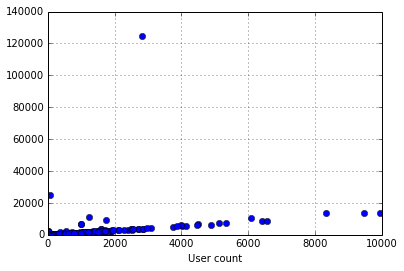

In [5]:
groupUserData.plot(x='User count',y='Listen count',style='o')

In [78]:
groupUserData.describe()

,User count,Listen count
count,81175.000000,81175.000000
mean,9.091124,15.256458
std,103.084892,475.104032
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,3.000000,4.000000
max,9938.000000,124832.000000


In [67]:
filterData=groupUserData[groupUserData['User count']<=4000]
filterData.head(6)

,User count,Listen count
songID,,
101,1,1
505,1,1
526,1,1
604,1,1
627,1,1
638,2,2


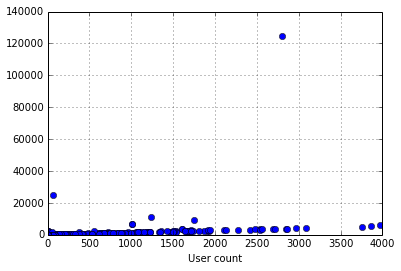

In [68]:
filterData.plot(x='User count',y='Listen count',style='o')

In [61]:
abnormal=filterData[filterData['Listen count']>5000]
print abnormal

            User count  Listen count
songID                              
1075509248          68         24924
1075528563        1003          6610
1075551390        1231         10914
1075750534        1744          9305
1075750904        2806        124832
1075752143        1010          6928
1075752246        3974          6361
1075755099        3869          5285

[8 rows x 2 columns]


# For Username

In [52]:
groupUser=dataUser.groupby(['username']).agg({'songID':pd.Series.nunique,'username':pd.Series.count})
groupUser.head(6)

,username,songID
username,,
0.gameplay,7,7
0000bi1111,1,1
000111sdfg,23,18
0007thien,13,11
000baokhanh,18,14
000c0c000,1,1


In [53]:
groupUser.columns=['Listen count','Song count']
print groupUser.head(6)


             Listen count  Song count
username                             
0.gameplay              7           7
0000bi1111              1           1
000111sdfg             23          18
0007thien              13          11
000baokhanh            18          14
000c0c000               1           1

[6 rows x 2 columns]


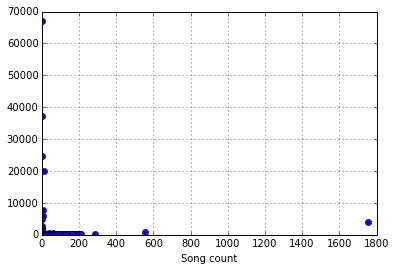

In [54]:
groupUser.plot(x='Song count',y='Listen count',style='o')

# For IP

In [56]:
groupIPData=data.groupby(['IP']).agg({'songID':pd.Series.nunique,'IP':pd.Series.count})
groupIPData.head(6)

,IP,songID
IP,,
0.0.111.228,1,1
0.0.39.210,1,1
0.126.211.43,1,1
0.135.170.170,1,1
1.0.255.125,1,1
1.1.145.81,1,1


In [57]:
groupIPData.columns=['Listen count','Song count']
print groupIPData.head(6)

               Listen count  Song count
IP                                     
0.0.111.228               1           1
0.0.39.210                1           1
0.126.211.43              1           1
0.135.170.170             1           1
1.0.255.125               1           1
1.1.145.81                1           1

[6 rows x 2 columns]


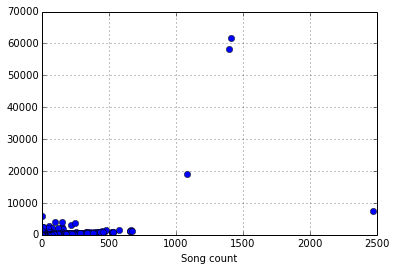

In [69]:
groupIPData.plot(x='Song count',y='Listen count',style='o')

In [70]:
data.head(6)

,songID,IP,username,visitorID,details,t1,t10
0,1075542680,1.55.197.9,NaN,NaN,"{""strGenreId"":""1"",""from_id"":""album"",""artistId""...",1,10
1,6222235,42.114.37.199,maimaimotminhta123,NaN,"{""strGenreId"":""1"",""artistId"":""0"",""id"":""6222235...",1,10
2,1074700863,118.70.81.116,NaN,NaN,"{""strGenreId"":""1"",""artistId"":""40466"",""id"":""107...",1,10
3,1074797521,113.175.241.192,NaN,NaN,"{""strGenreId"":""1"",""artistId"":""16409"",""id"":""107...",1,10
4,1075758987,14.176.230.140,NaN,NaN,"{""strGenreId"":""1"",""artistId"":""66503"",""id"":""107...",1,10
5,6073170,101.53.22.206,NaN,NaN,"{""strGenreId"":""3"",""artistId"":""0"",""id"":""6073170...",1,10


In [76]:
exportData=data[['songID','IP','username']]
exportData.head(6)

,songID,IP,username
0,1075542680,1.55.197.9,NaN
1,6222235,42.114.37.199,maimaimotminhta123
2,1074700863,118.70.81.116,NaN
3,1074797521,113.175.241.192,NaN
4,1075758987,14.176.230.140,NaN
5,6073170,101.53.22.206,NaN


In [77]:
exportData.to_csv('data_0410', sep='\t')

In [16]:
 dataTo=groupUserData[['User count','Listen count']]
dataTo.head(6)

,User count,Listen count
songID,,
101,1,1
505,1,1
526,1,1
604,1,1
627,1,1
638,2,2


In [18]:
dataTo.to_csv('data', sep='\t')

In [170]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = [[x] for x in groupUserData['User count'].values]
Y = [[x] for x in groupUserData['Listen count'].values]
lr.fit(X,Y)
LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lr.coef_


array([[ 1.87128912]])

In [22]:
lr.intercept_

array([-1.75566341])

In [23]:
import numpy as np
import statsmodels.api as sm
X = [[x] for x in groupUserData['User count'].values]
Y = [[x] for x in groupUserData['Listen count'].values]
results = sm.OLS(Y, X).fit()
print results.summary()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                 1.612e+04
Date:                Fri, 14 Oct 2016   Prob (F-statistic):               0.00
Time:                        09:01:56   Log-Likelihood:            -6.0820e+05
No. Observations:               81175   AIC:                         1.216e+06
Df Residuals:                   81174   BIC:                         1.216e+06
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.8698      0.015    126.972      0.000         1.841     1.899
Omnibus:                   427402.259   Durbin-Watso

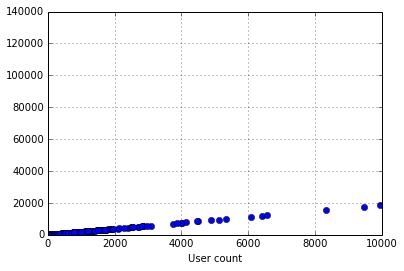

In [171]:
y2=groupUserData['User count']*1.87128912-1.75566341
y2=pd.concat([groupUserData['User count'], y2], axis=1)
y2.columns=['User count','Listen count']
y2.plot(x='User count',y='Listen count',style='o',xlim=(0,10000),ylim=(0,140000))

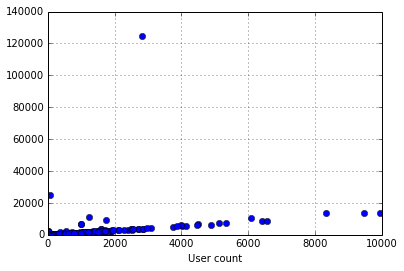

In [78]:
groupUserData.plot(x='User count',y='Listen count',style='o')

In [7]:
groupUserData.describe()

,User count,Listen count
count,81175.000000,81175.000000
mean,9.091124,15.256458
std,103.084892,475.104032
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,3.000000,4.000000
max,9938.000000,124832.000000


In [110]:
groupUserInt=groupUserData['Listen count'].values.astype(int)
Q3, Q1 = np.percentile(groupUserInt, [75 ,25])
IQR=Q3-Q1
neg=Q1-1.5*IQR
pos=Q3+1.5*IQR
print neg, pos


-3.5 8.5


In [154]:
temp=groupUserData[groupUserData['Listen count']<=8.5]
temp.head(5)


,User count,Listen count
songID,,
101,1,1
505,1,1
526,1,1
604,1,1
627,1,1


In [155]:
temp.describe()

,User count,Listen count
count,70065.000000,70065.000000
mean,1.599872,2.074788
std,1.181935,1.672112
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,3.000000
max,8.000000,8.000000


In [145]:
import numpy as np
import statsmodels.api as sm
X = [[x] for x in temp['User count'].values]
Y = [[x] for x in temp['Listen count'].values]
results = sm.OLS(Y, X).fit()
print results.summary()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 5.992e+05
Date:                Fri, 14 Oct 2016   Prob (F-statistic):               0.00
Time:                        10:44:06   Log-Likelihood:            -4.4200e+05
No. Observations:               81173   AIC:                         8.840e+05
Df Residuals:                   81172   BIC:                         8.840e+05
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.4783      0.002    774.087      0.000         1.475     1.482
Omnibus:                   323731.548   Durbin-Watso

In [146]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = [[x] for x in temp['User count'].values]
Y = [[x] for x in temp['Listen count'].values]
lr.fit(X,Y)
LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
lr.coef_


array([[ 1.47828409]])

In [147]:
lr.intercept_

array([ 0.02467967])

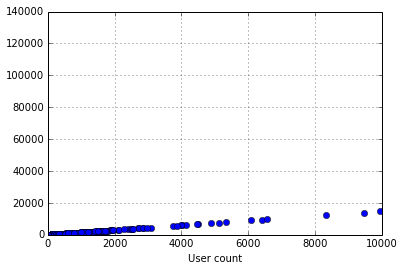

In [148]:
y2=temp['User count']*1.47828409+0.02467967
y2=pd.concat([temp['User count'], y2], axis=1)
y2.columns=['User count','Listen count']
y2.plot(x='User count',y='Listen count',style='o',xlim=(0,10000),ylim=(0,140000))

In [149]:
y2.head(7)

,User count,Listen count
songID,,
101,1,1.502964
505,1,1.502964
526,1,1.502964
604,1,1.502964
627,1,1.502964
638,2,2.981248
717,1,1.502964


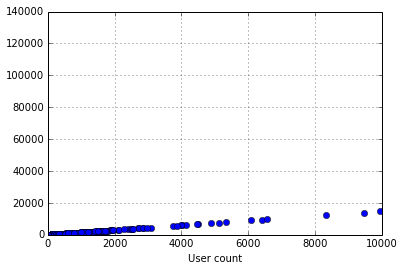

In [150]:
y2=temp['User count']*1.4783
y2=pd.concat([temp['User count'], y2], axis=1)
y2.columns=['User count','Listen count']
y2.plot(x='User count',y='Listen count',style='o',xlim=(0,10000),ylim=(0,140000))

In [151]:
y2.head(7)

,User count,Listen count
songID,,
101,1,1.4783
505,1,1.4783
526,1,1.4783
604,1,1.4783
627,1,1.4783
638,2,2.9566
717,1,1.4783


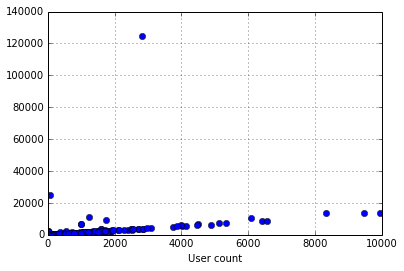

In [152]:
groupUserData.plot(x='User count',y='Listen count',style='o')

# ANOVA

In [1]:
groupUserData.describe()

NameError: name 'groupUserData' is not defined

In [166]:

from sklearn import linear_model, datasets
# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, Y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print inlier_mask,outlier_mask,model_ransac.estimator_.coef_,model_ransac.estimator_.intercept_

 [ True  True  True ...,  True  True  True] [False False False ..., False False False] [[ 1.1342592]] [-0.01492464]


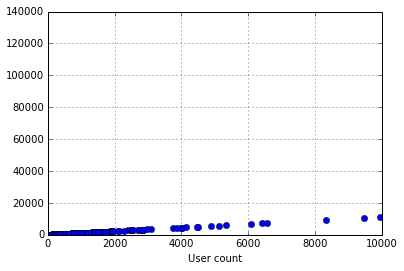

In [184]:
y2=groupUserData['User count']*1.1342592-0.01492464
y2=pd.concat([groupUserData['User count'], y2], axis=1)
y2.columns=['User count','Listen count']
y2.plot(x='User count',y='Listen count',style='o',xlim=(0,10000),ylim=(0,140000))

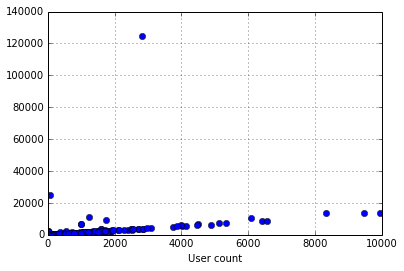

In [172]:
groupUserData.plot(x='User count',y='Listen count',style='o')

In [234]:
y3=y2['Listen count']+3*475.104032
y3.head()

songID
101       1426.431431
505       1426.431431
526       1426.431431
604       1426.431431
627       1426.431431
Name: Listen count, dtype: float64

In [174]:
Xb= [[x] for x in groupUserData['User count'].values]
Yb= [[x] for x in groupUserData['Listen count'].values]

In [43]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(Xb, Yb)
plt.axis([0,10000, 0,140000])
plt.show()


NameError: name 'Xb' is not defined

[0, 10000, 0, 140000]

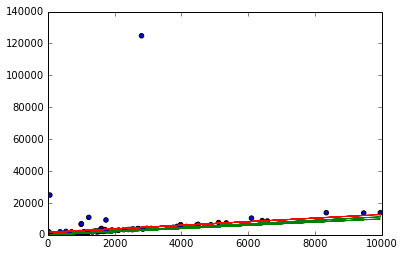

In [235]:
plt.plot(Xb,y2,'g')
plt.scatter(Xb, Yb)
plt.plot(Xb, y3,color='red')
plt.axis([0,10000, 0,140000])


In [236]:
list=[]
user=[]
for i in xrange(1,len(y3)):
    if(groupUserData['Listen count'].values[i])>y3.values[i]:
        list.append(groupUserData['Listen count'].values[i])
        user.append(groupUserData['User count'].values[i])
print len(list)
da=pd.DataFrame(user,list)
print da

30
           0
1617       2
1715       7
2070       7
1705       6
2339       7
1761       7
2056       9
2031       6
1634       6
2140       7
3866    1606
3948    1603
7697    5109
8918    6410
24924     68
6610    1003
2125     551
6546    4500
10914   1231
13826   9938
9305    1744
124832  2806
13636   9443
6928    1010
6361    3974
1874     376
1512      14
13865   8325
10470   6090
1502      53

[30 rows x 1 columns]


In [5]:
groupUserData.describe()

,User count,Listen count
count,81175.000000,81175.000000
mean,9.091124,15.256458
std,103.084892,475.104032
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,3.000000,4.000000
max,9938.000000,124832.000000


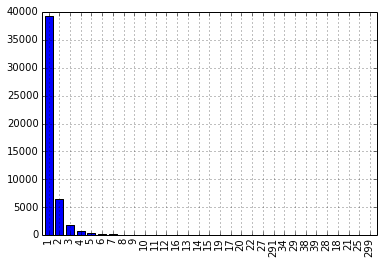

In [91]:
group1=groupUserData[groupUserData['User count']==1]
data1=group1['Listen count']
fig, ax = plt.subplots()
data1.value_counts().plot(ax=ax, kind='bar')

In [85]:
data1.describe()

count    49477.000000
mean         1.402611
std          2.210568
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        299.000000
Name: Listen count, dtype: float64

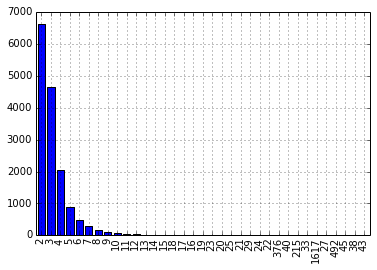

In [93]:
group2=groupUserData[groupUserData['User count'].isin([2,3])]
data2=group2['Listen count']
fig, ax = plt.subplots()
data2.value_counts().plot(ax=ax, kind='bar')

In [94]:
data2.describe()

count    15510.000000
mean         3.416763
std         14.110957
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max       1617.000000
Name: Listen count, dtype: float64

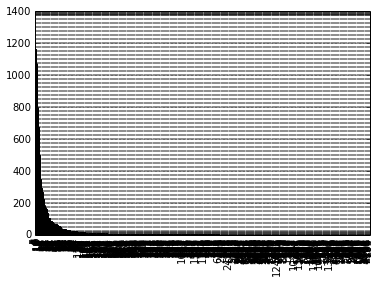

In [95]:
group3=groupUserData[groupUserData['User count']>3]
data3=group3['Listen count']
fig, ax = plt.subplots()
data3.value_counts().plot(ax=ax, kind='bar')

In [96]:
data2.describe()

count    15510.000000
mean         3.416763
std         14.110957
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max       1617.000000
Name: Listen count, dtype: float64

# For Group 1

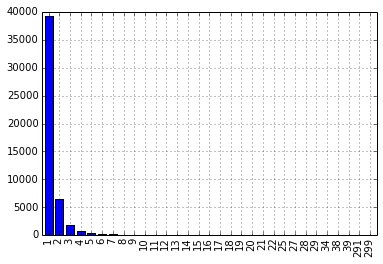

In [132]:
fig, ax = plt.subplots()
data1.value_counts().sort_index().plot(ax=ax, kind='bar')

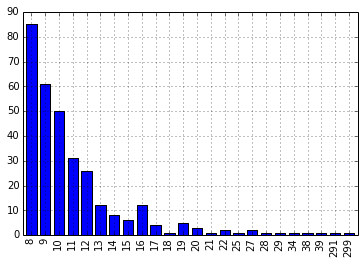

In [151]:
d=data1.value_counts().sort_index()[7:]
fig, ax = plt.subplots()
d.plot(ax=ax, kind='bar')

         User count  Listen count
songID                           
6223989           1           299

[1 rows x 2 columns]



# For group 2

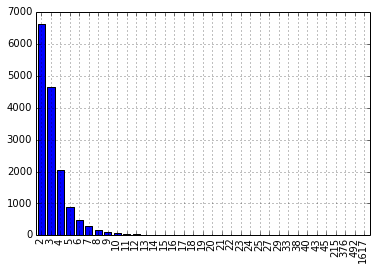

In [152]:
fig, ax = plt.subplots()
data2.value_counts().sort_index().plot(ax=ax, kind='bar')

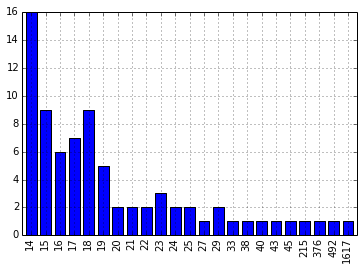

In [153]:
d2=data2.value_counts().sort_index()[12:]
fig, ax = plt.subplots()
d2.plot(ax=ax, kind='bar')

In [177]:
print group2[group2['Listen count']==1617]

         User count  Listen count
songID                           
5888119           2          1617

[1 rows x 2 columns]


In [137]:
groupUserInt=groupUserData['User count'].values.astype(int)
Q90,Q95,Q99 = np.percentile(groupUserInt, [90 ,95,99])
print Q90,Q95,Q99

9.0 21.0 123.0


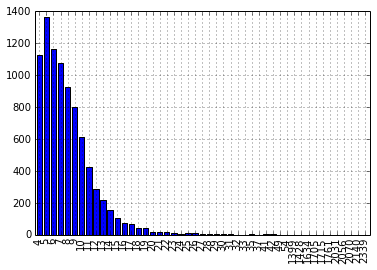

In [154]:
group4=groupUserData[groupUserData['User count'].isin([4,5,6,7,8,9])]
data4=group4['Listen count']
fig, ax = plt.subplots()
data4.value_counts().sort_index().plot(ax=ax, kind='bar')

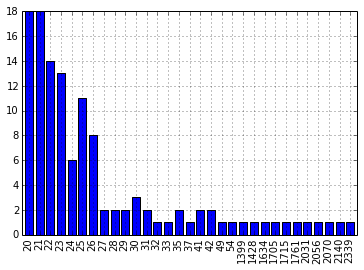

In [165]:
d4=data4.value_counts().sort_index()[16:]
fig, ax = plt.subplots()
d4.plot(ax=ax, kind='bar')

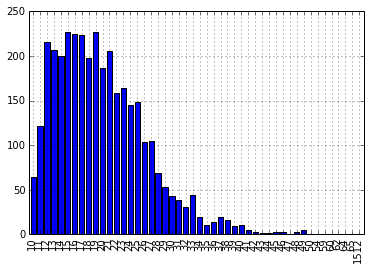

In [157]:
group5=groupUserData[groupUserData['User count'].isin([10,11,12,13,14,15,16,17,18,19,20,21])]
data5=group5['Listen count']
fig, ax = plt.subplots()
data5.value_counts().sort_index().plot(ax=ax, kind='bar')

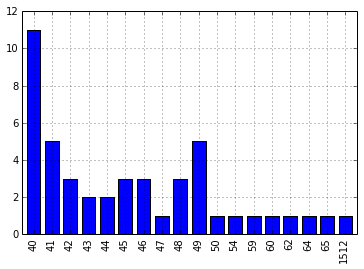

In [163]:
d5= data5.value_counts().sort_index()[30:]
fig, ax = plt.subplots()
d5.plot(ax=ax, kind='bar')

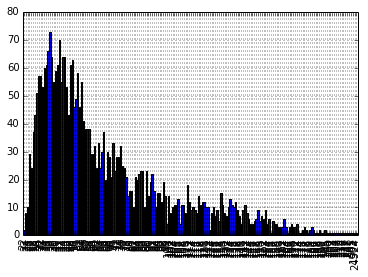

In [167]:
group6=groupUserData[groupUserData['User count']>21]
group6=group6[group6['User count']<=123]
data6=group6['Listen count']
fig, ax = plt.subplots()
data6.value_counts().sort_index().plot(ax=ax, kind='bar')

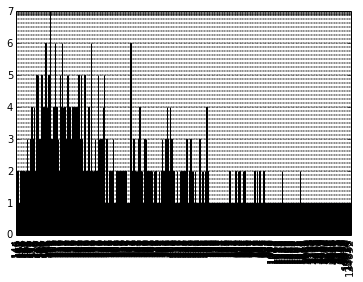

In [168]:
group7=groupUserData[groupUserData['User count']>123]
data7=group7['Listen count']
fig, ax = plt.subplots()
data7.value_counts().sort_index().plot(ax=ax, kind='bar')

In [179]:
print group7.describe()

        User count   Listen count
count   807.000000     807.000000
mean    492.016109     882.287485
std     907.033288    4595.878991
min     124.000000     144.000000
25%     164.000000     226.000000
50%     233.000000     329.000000
75%     374.000000     522.000000
max    9938.000000  124832.000000

[8 rows x 2 columns]


In [180]:
groupUserInt=group7['User count'].values.astype(int)
Q90,Q95,Q99 = np.percentile(groupUserInt, [90 ,95,99])
print Q90,Q95,Q99

1033.0 1711.4 4856.26


In [181]:
groupUserInt=group7['Listen count'].values.astype(int)
Q90,Q95,Q99 = np.percentile(groupUserInt, [90 ,95,99])
print Q90,Q95,Q99

1495.2 2665.7 8614.44


In [183]:
print groupUserData[groupUserData['User count']>4856]

            User count  Listen count
songID                              
1075465009        5109          7697
1075507785        6410          8918
1075525108        6567          8673
1075550604        4879          6362
1075552481        9938         13826
1075751008        9443         13636
1075752472        5337          7458
1075757848        8325         13865
1075758987        6090         10470

[9 rows x 2 columns]


In [184]:
print groupUserData[groupUserData['Listen count']>8614]

            User count  Listen count
songID                              
1075507785        6410          8918
1075509248          68         24924
1075525108        6567          8673
1075551390        1231         10914
1075552481        9938         13826
1075750534        1744          9305
1075750904        2806        124832
1075751008        9443         13636
1075757848        8325         13865
1075758987        6090         10470

[10 rows x 2 columns]
